In [1]:
import neo4j

import pandas as pd

from IPython.display import display

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Functions

In [3]:
def my_neo4j_wipe_out_database():
    "wipe out database by deleting all nodes and relationships"
    
    query = "match (node)-[relationship]->() delete node, relationship"
    session.run(query)
    
    query = "match (node) delete node"
    session.run(query)

In [4]:
def my_neo4j_run_query_pandas(query, **kwargs):
    "run a query and return the results in a pandas dataframe"
    
    result = session.run(query, **kwargs)
    
    df = pd.DataFrame([r.values() for r in result], columns=result.keys())
    
    return df

In [5]:
def my_neo4j_nodes_relationships():
    "print all the nodes and relationships"
   
    print("-------------------------")
    print("  Nodes:")
    print("-------------------------")
    
    query = """
        match (n) 
        return n.name as node_name, labels(n) as labels
        order by n.name
    """
    
    df = my_neo4j_run_query_pandas(query)
    
    number_nodes = df.shape[0]
    
    display(df)
    
    print("-------------------------")
    print("  Relationships:")
    print("-------------------------")
    
    query = """
        match (n1)-[r]->(n2) 
        return n1.name as node_name_1, labels(n1) as node_1_labels, 
            type(r) as relationship_type, n2.name as node_name_2, labels(n2) as node_2_labels
        order by node_name_1, node_name_2
    """
    
    df = my_neo4j_run_query_pandas(query)
    
    number_relationships = df.shape[0]
    
    display(df)
    
    density = (2 * number_relationships) / (number_nodes * (number_nodes - 1))
    
    print("-------------------------")
    print("  Density:", f'{density:.1f}')
    print("-------------------------")
    

# EDA

<b> Refugees: </b>Refugees include individuals recognized under the 1951 Convention relating to the Status of Refugees, its 1967 Protocol, the 1969 Organization of African Unity (OAU) Convention Governing the Specific Aspects of Refugee Problems in Africa, the refugee definition contained in the 1984 Cartagena Declaration on Refugees as incorporated into national laws, those recognized in accordance with the UNHCR Statute, individuals granted complementary forms of protection, and those enjoying temporary protection. The refugee population also includes people in refugee-like situations.

<i>People in a refugee-like situation refers to a category which is descriptive in nature and includes groups of people who are outside their country or territory of origin and who face protection risks similar to those of refugees, but <u>for whom refugee status has, for practical or other reasons, not been ascertained.</u></i>

<b> Asylum Seekers: </b>Asylum-seekers are individuals who have sought international protection and whose claims for refugee status have not yet been determined.

<b>Internally displaced persons (IDPs)</b> are persons or groups of persons who have been forced or obliged to flee or to leave their homes or places of habitual residence, in particular as a result of, or in order to avoid the effects of armed conflict, situations of generalized violence, violations of human rights or natural or human-made disasters, and who have not crossed an internationally recognized State border. For the purposes of UNHCR’s statistics, this population includes only conflict-generated IDPs to whom the Office extends protection and/or assistance. The IDP population also includes people in an IDP-like situation.

<i>People in an IDP-like situation refers to a category which is descriptive in nature and includes groups of people who are inside their country of nationality or habitual residence and who face protection risks similar to those of IDPs but <u>who, for practical or other reasons, could not be reported as such.</u></i>

In [17]:
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-08-22/population.csv'
pop = pd.read_csv(url)

In [21]:
selectpop = pop[(pop['year'] >= 2010) & (pop['year'] < 2020)]

In [36]:
#for whom origin=asylum. Seems to largely be for IDPs. 
#Not sure about situations like Sweden here asylum_seekers=21 and all other types 0.
selectpop[selectpop['coo'] == selectpop['coa']].sample(10)

,year,coo_name,coo,coo_iso,coa_name,coa,coa_iso,refugees,asylum_seekers,returned_refugees,idps,returned_idps,stateless,ooc,oip,hst
39852,2018,Jordan,JOR,JOR,Jordan,JOR,JOR,0,0,0,0,0,0,1355,NaN,NaN
30660,2016,Philippines,PHI,PHL,Philippines,PHI,PHL,0,0,0,87418,255626,0,0,NaN,NaN
23137,2015,Cameroon,CMR,CMR,Cameroon,CMR,CMR,0,0,0,92657,18636,0,0,NaN,NaN
39346,2018,Croatia,HRV,HRV,Croatia,HRV,HRV,0,0,0,0,0,0,4376,NaN,NaN
36057,2017,Serbia and Kosovo: S/RES/1244 (1999),SRB,SRB,Serbia and Kosovo: S/RES/1244 (1999),SRB,SRB,0,0,0,217453,193,0,0,NaN,NaN
11818,2012,Rwanda,RWA,RWA,Rwanda,RWA,RWA,0,0,0,0,0,0,89,NaN,NaN
23197,2015,Colombia,COL,COL,Colombia,COL,COL,0,0,0,6939067,0,0,0,NaN,NaN
18349,2014,Congo,COB,COG,Congo,COB,COG,0,0,0,0,0,0,101,NaN,NaN
28140,2016,Colombia,COL,COL,Colombia,COL,COL,0,0,0,7410816,0,0,0,NaN,NaN
12155,2012,Sweden,SWE,SWE,Sweden,SWE,SWE,0,21,0,0,0,0,0,NaN,NaN


In [224]:
selectpop=selectpop[(selectpop['coo'] != selectpop['coa']) & (selectpop['coo'] != 'UKN') & (selectpop['coa'] != 'UKN')]



In [225]:
selectpop.describe()

,year,refugees,asylum_seekers,returned_refugees,idps,returned_idps,stateless,ooc,oip,hst
count,46978,46978,46978,46978,46978,46978,46978,46978,36,0
mean,2015,3194,414,78,0,0,768,76,171532,NaN
std,3,50241,4200,2652,0,0,19780,2544,353168,NaN
min,2010,0,0,0,0,0,0,0,11,NaN
25%,2012,5,0,0,0,0,0,0,13673,NaN
50%,2015,13,8,0,0,0,0,0,32830,NaN
75%,2017,91,51,0,0,0,0,0,138700,NaN
max,2019,3622366,482571,381275,0,0,955399,162842,1771237,NaN


## COO EDA

In [226]:
#top 3 COOs 2010-2019
cootopdf=pd.DataFrame(columns=['coo','year','refugees'])
for year in list(set(selectpop.year)):
    cootopdf = pd.concat([cootopdf,selectpop.groupby(['coo','year']).sum().xs(year, level=1, drop_level=False)[['refugees']].sort_values(by='refugees',ascending=False).head(3).reset_index()], ignore_index=True)
cootopdf=cootopdf.sort_values(by=['year','refugees'],ascending=[True,False]).set_index(['year','coo'])


In [227]:
selectpop.set_index(['coo','coa']).loc[[('AFG','IRN'),('IRN','AFG')]].query('year == 2010')
#example of a situation where refugees from A went to B, and refugees from B went to A

,,year,coo_name,coo_iso,coa_name,coa_iso,refugees,asylum_seekers,returned_refugees,idps,returned_idps,stateless,ooc,oip,hst
coo,coa,,,,,,,,,,,,,,
AFG,IRN,2010,Afghanistan,AFG,Iran (Islamic Rep. of),IRN,1027577,1639,8487,0,0,0,0,NaN,NaN
IRN,AFG,2010,Iran (Islamic Rep. of),IRN,Afghanistan,AFG,30,21,0,0,0,0,0,NaN,NaN


In [228]:
cootopdf_reset = cootopdf.reset_index()

cootopdf_reset['label'] = cootopdf_reset.groupby('year').cumcount() + 1


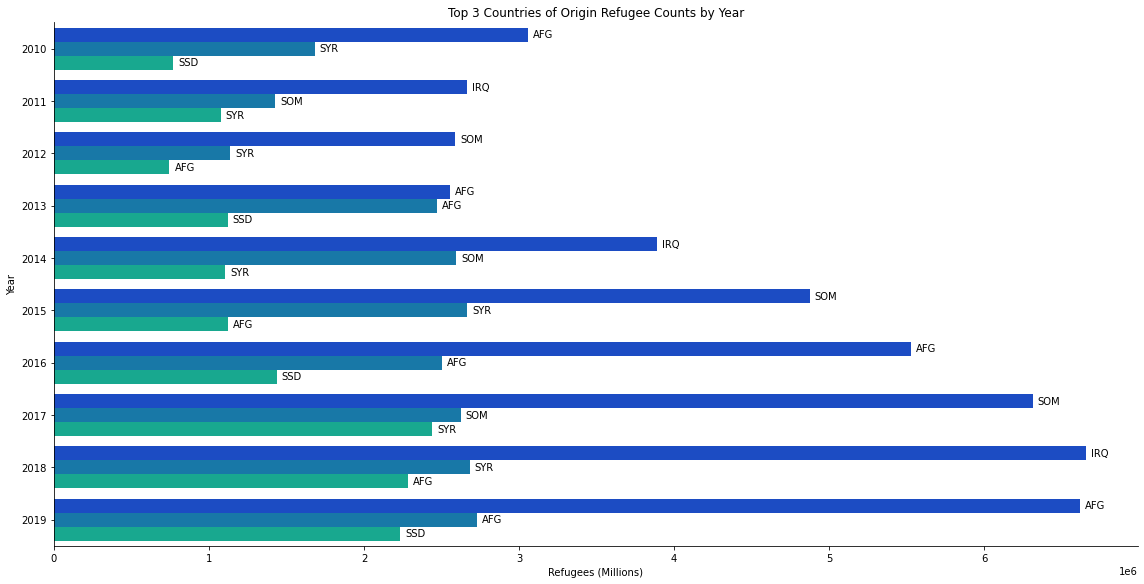

In [229]:

g= sns.catplot(
    data=cootopdf_reset, kind="bar", orient='h',
    x="refugees", y="year", hue="label",legend=False,height=8, aspect=2,palette='winter')
plt.xlabel('Refugees (Millions)')
plt.ylabel('Year')
plt.title('Top 3 Countries of Origin Refugee Counts by Year')

ax = g.facet_axis(0, 0)



for p, label in zip(ax.patches, list(cootopdf_reset['coo'])):
    # Add annotation
    ax.annotate(label, (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')



Text(0.5, 1.0, 'Top 3 Countries of Origin Refugee Counts by Year')

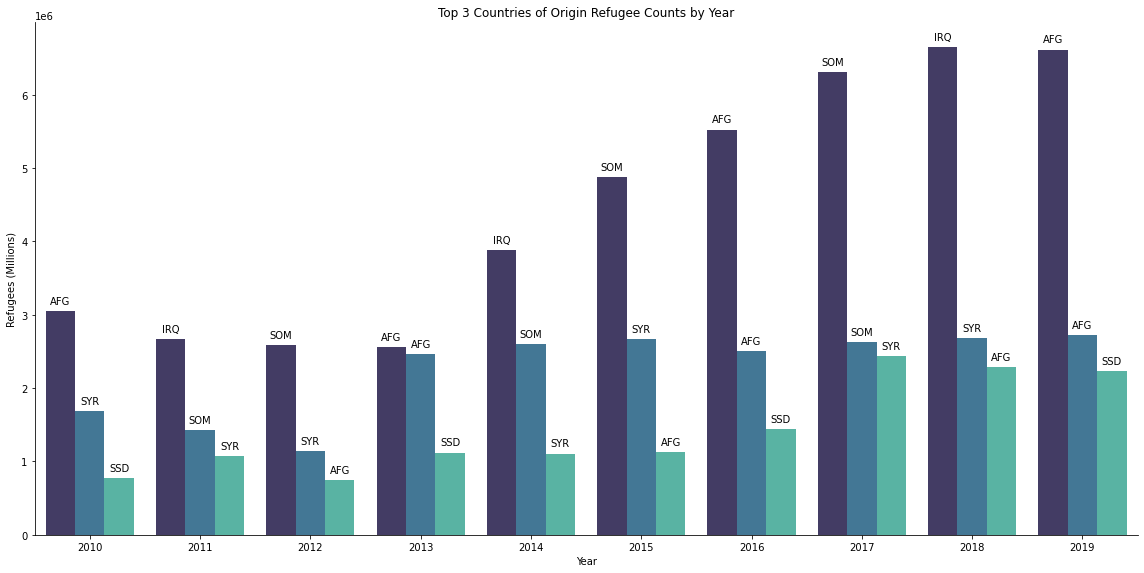

In [230]:
g = sns.catplot(
    data=cootopdf_reset, kind="bar", orient='v',
    x="year", y="refugees", hue="label",
    height=8, aspect=2, legend=False, palette='mako'
)

# Get the axis of the first subplot
ax = g.facet_axis(0, 0)

# Iterate over the patches (bars) and custom labels
for p, label in zip(ax.patches, list(cootopdf_reset['coo'])):
    # Add annotation
    ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Refugees (Millions)')
plt.title('Top 3 Countries of Origin Refugee Counts by Year')


## COA EDA

In [212]:
#top 3 COAs 2010-2019
asyltopdf=pd.DataFrame(columns=['coa','year','refugees'])
for year in list(set(selectpop.year)):
    asyltopdf = pd.concat([asyltopdf,selectpop.groupby(['coa','year']).sum().xs(year, level=1, drop_level=False)[['refugees']].sort_values(by='refugees',ascending=False).head(3).reset_index()], ignore_index=True)
asyltopdf=asyltopdf.sort_values(by=['year','refugees'],ascending=[True,False]).set_index(['year','coa'])


In [215]:
selectpop.groupby(['coa','year']).sum()

refugees  asylum_seekers  returned_refugees  idps  returned_idps  \
coa year                                                                     
ABW 2011         0               5                  0     0              0   
    2012         0               5                  0     0              0   
    2013         0               5                  0     0              0   
    2014         0               5                  0     0              0   
    2016         0               5                  0     0              0   
...            ...             ...                ...   ...            ...   
ZIM 2015      6943             257                  0     0              0   
    2016      7423             948                  0     0              0   
    2017      7566            8392                  0     0              0   
    2018      7795           10207                  0     0              0   
    2019      8956           11532                  0     0              0   

          stateless   ooc  oip  hst  
coa year                             
ABW 2011          0     0    0    0  
    2012          0     0    0    0  
    2013          0     0    0    0  
    2014          0     0    0    0  
    2016          0     0    0    0  
...             ...   ...  ...  ...  
ZIM 2015     300000  3240    0    0  
    2016          0  1543    0    0  
    2017          0  2722    0    0  
    2018          0   743    0    0  
    2019          0   836    0    0  

[1731 rows x 9 columns]

In [231]:
selectpop[selectpop['coo_name']!='Unknown']

,year,coo_name,coo,coo_iso,coa_name,coa,coa_iso,refugees,asylum_seekers,returned_refugees,idps,returned_idps,stateless,ooc,oip,hst
1,2010,Iran (Islamic Rep. of),IRN,IRN,Afghanistan,AFG,AFG,30,21,0,0,0,0,0,NaN,NaN
2,2010,Iraq,IRQ,IRQ,Afghanistan,AFG,AFG,6,0,0,0,0,0,0,NaN,NaN
3,2010,Pakistan,PAK,PAK,Afghanistan,AFG,AFG,6398,9,0,0,0,0,0,NaN,NaN
4,2010,Egypt,ARE,EGY,Albania,ALB,ALB,5,0,0,0,0,0,0,NaN,NaN
5,2010,China,CHI,CHN,Albania,ALB,ALB,6,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47795,2019,Venezuela (Bolivarian Republic of),VEN,VEN,Aruba,ABW,ABW,0,398,0,0,0,0,0,16602,NaN
47796,2019,Colombia,COL,COL,Curacao,CUW,CUW,28,49,0,0,0,0,0,NaN,NaN
47797,2019,Venezuela (Bolivarian Republic of),VEN,VEN,Curacao,CUW,CUW,14,296,0,0,0,0,0,16190,NaN
47798,2019,Cuba,CUB,CUB,Sint Maarten (Dutch part),SXM,SXM,0,5,0,0,0,0,0,NaN,NaN


# Neo4j

In [340]:
driver = neo4j.GraphDatabase.driver(uri="neo4j://neo4j:7687", auth=("neo4j","ucb_mids_w205"))

In [341]:
session = driver.session(database="neo4j")

In [349]:
#year version (does Not work) :( gives empty graph
def my_create_connected_graph():
    my_neo4j_wipe_out_database()
    
    query1 = """
    LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-08-22/population.csv' AS row
    WITH row WHERE row.year = '2010'
    MERGE (o:COO {name: row.coo, refugees: row.refugees})
    MERGE (a:COA {name: row.coa})
    WITH o, a
    MATCH (o:COO), (a:COA)
    MERGE (o)-[:EMIGRATED_TO]->(a)
    RETURN *
    
    ;"""

    
    try:
        result = session.run(query1, year=[str(year)])
        print("Created successfully.")
    except Exception as e:
        print(f"Error: {e}")
    
#     query2 = """
#     MATCH (o:COO), (a:COA)
#     MERGE (o)-[:EMIGRATED_TO]->(a)
#     RETURN *;"""

  
#     try:
#         result = session.run(query2)
#         print("Relationships created successfully.")
#     except Exception as e:
#         print(f"Error: {e}")
    
    



In [309]:
#     LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-08-22/population.csv' AS row
#     WITH row WHERE row.year = '2010'
#     MERGE (o:COO {name: row.coo, refugees: row.refugees})
#     MERGE (a:COA {name: row.coa})
#     WITH o, a
#     MATCH (o:COO), (a:COA)
#     MERGE (o)-[:EMIGRATED_TO]->(a)
#     RETURN *
    

0        AFG
1        IRN
2        IRQ
3        PAK
4        ARE
        ... 
64804    VEN
64805    ABW
64806    VEN
64807    CUW
64808    VEN
Name: coo, Length: 64809, dtype: object

In [354]:
def my_create_connected_graph():
    my_neo4j_wipe_out_database()
    
    query1 = """
    LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-08-22/population.csv' AS row
    WITH row WHERE row.year = '2010'
    MERGE (o:COO {name: row.coo, refugees: toInteger(row.refugees)})
    MERGE (a:COA {name: row.coa})
    WITH o, a
    MATCH (o:COO), (a:COA)
    MERGE (o)-[:EMIGRATED_TO  {weight: toInteger(o.refugees)}]->(a)
    RETURN *"""

    try:
        result = session.run(query1)
        print("Nodes and relationships created successfully.")
    except Exception as e:
        print(f"Error: {e}")

# Example usage
my_create_connected_graph()
#somehow this exact query works in neo4j but not when I run it from python and then do match (n) return n in neo4j
#also think I'm using merge wrong

Nodes and relationships created successfully.
